# Life Expectancy - GDP
This project will analyze data of GDP and life expectancy from the World Health Organization and the World Bank to try to identify the relationship between the GDP and life expectancy of six countries.

## Project Scoping 
### Goals
The goal of this project is to find a relationship between the life expectancy of people in six different countries and the GDP of the country. 

### Data
We have data from the World Health Organization and the World Bank which includes the country and the life expectancy and GDP from a specific year. 

### Analysis 
The primary analysis that will be done is checking the data is complete, and then plotting the life expectancy and years to see if there is any relationship between the variables. If there is any linear relation, then make a model that predicts life expectancy based on GDP using linear regression.

In [20]:
import pandas as pd

countries_info = pd.read_csv('all_data.csv')
countries_info.rename(columns={'Life expectancy at birth (years)':'Life_expectancy'}, inplace=True) # change name of columns
print(f'Total number of columns: {len(countries_info)}')
print()
print(countries_info.info())
print()
print(countries_info.head(10))
print()
print(f'Columns: {countries_info.columns}')
print()
print(f'Countries: {countries_info.Country.unique()}')

Total number of columns: 96

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
5   Chile  2005             78.4  1.229650e+11
6   Chile  2006             78.9  1.547880e+11
7   Chile  2007             78.9  1.736060e+11
8   Chile  2008             79.6  1.796380e+11
9   Chile  2009             79.3  1.723890e+11

Columns

## Data
As seen in the previous step, the data contains six different countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe. There are 96 columns of data for all the countries and the data doesn't have null values. The next step is to plot the countries and use pearson correlation to find if there is any linear correlation between life expectancy and GDP.

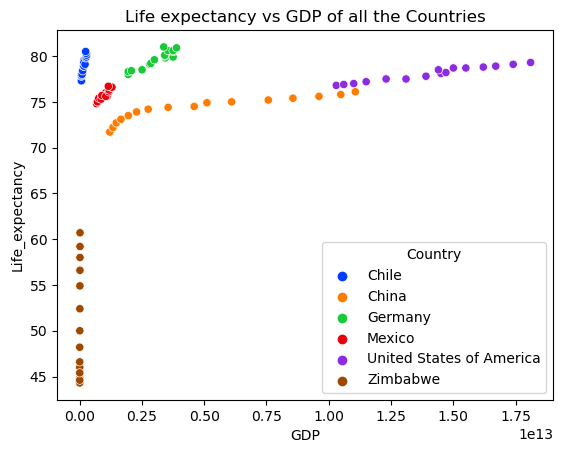

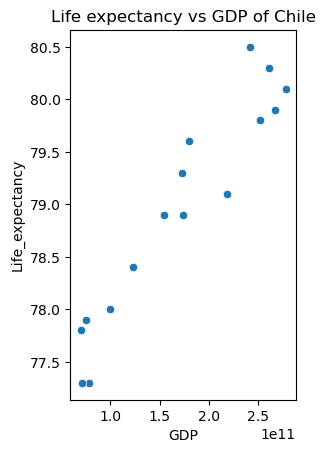

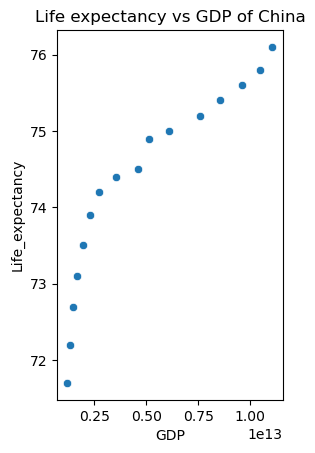

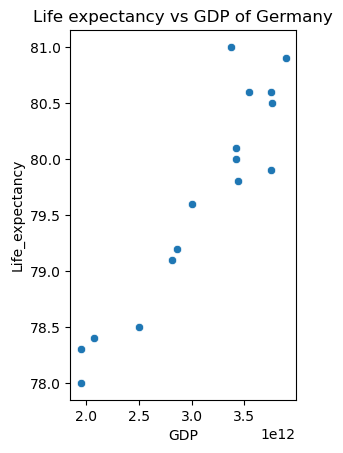

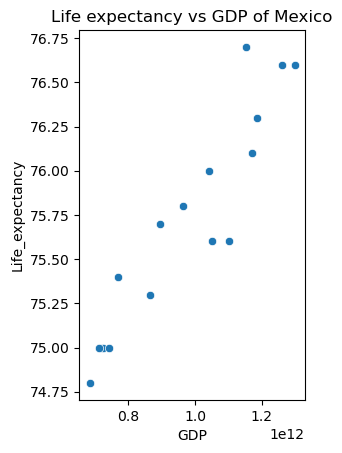

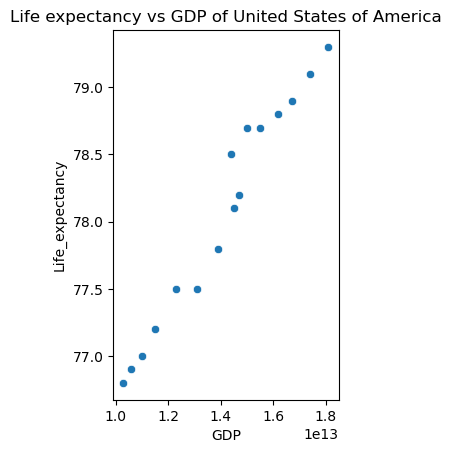

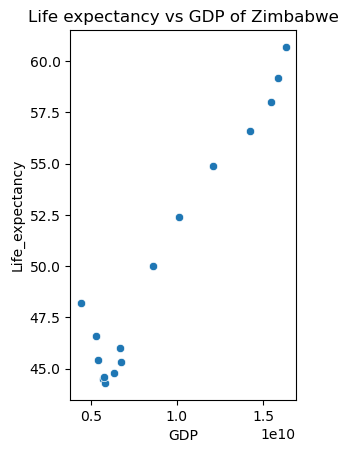

<Figure size 640x480 with 0 Axes>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.scatterplot(x = 'GDP', y = 'Life_expectancy', hue = 'Country', palette = 'bright', data = countries_info)
plt.title(f'Life expectancy vs GDP of all the Countries')
plt.show()
plt.clf()

countries = countries_info.Country.unique()

for country in countries:
    country_info = countries_info[countries_info.Country == country]

    # scatter plot of all the countries
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = 'GDP', y = 'Life_expectancy', data = country_info)
    plt.title(f'Life expectancy vs GDP of {country}')
    plt.show()
    plt.clf()

From the graphs it can be shown that there seems a linear correlation between the variables. To validate the asumption, the pearson correlation will be used to asses the relationship.

In [37]:
import scipy.stats

for country in countries:
    country_info = countries_info[countries_info.Country == country]
    
    corr_coefficient, pvalue = scipy.stats.pearsonr(country_info.Life_expectancy, country_info.GDP)
    print(f'The correlation coefficient of {country} is: {corr_coefficient} with a pvalue of {pvalue}')
    

The correlation coefficient of Chile is: 0.9498766659254413 with a pvalue of 1.8659139746586447e-08
The correlation coefficient of China is: 0.9085255408648356 with a pvalue of 1.1250985720700828e-06
The correlation coefficient of Germany is: 0.932698898256127 with a pvalue of 1.4018815534045607e-07
The correlation coefficient of Mexico is: 0.9322377167847085 with a pvalue of 1.4686960248304653e-07
The correlation coefficient of United States of America is: 0.9817092382430257 with a pvalue of 1.749970926909946e-11
The correlation coefficient of Zimbabwe is: 0.9661998955858779 with a pvalue of 1.2358516366845632e-09


## Analysis
The correlation coefficient shows that there is a linear correlation between the life expectancy and GDP of a country. All the correlation coefficients are between 0.90 and 0.98, showing a strong correlation. this means that we could use a simple linear regression model of the statsmodel library to predict the life expectancy based on GDP.

In [ ]:
import statsmodels.api as sm

model = sm.OLS.from_formula('score ~ lesson', codecademy).fit()